In [1]:
import pandas as pd
import numpy as np
import os 
import sys
sys.path.append("../../")
import seaborn as sns 
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from src import soporte_logistica_preprocesamiento as sl
from src import soporte_feature_scaling as sf
from src import soporte_encoding_logistica as se
from src import soporte_nulos as sn
from src import soporte_logistica_ensamble as sc
import warnings
warnings.filterwarnings("ignore")

c:\Users\almaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_pickle("../../data/cooked/con_duplicados/datos_conduplicados.pkl")
df.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StandardHours,...,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1.541369,0,-0.393938,-0.891688,0.0,0.153061,-0.961486,1.405136,-1.150554,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.648668,1,0.099639,-1.868426,0.0,0.153061,-0.961486,-0.491661,2.129306,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.539166,0,0.963398,1.061787,0.0,0.166667,1.749610,2.725053,-0.057267,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.117845,0,-0.887515,2.038524,0.0,0.166667,0.845911,0.386301,-1.150554,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.539166,0,0.099639,-1.868426,0.0,0.166667,-0.961486,-0.884109,-0.877232,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
GestorLogistica = sc.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

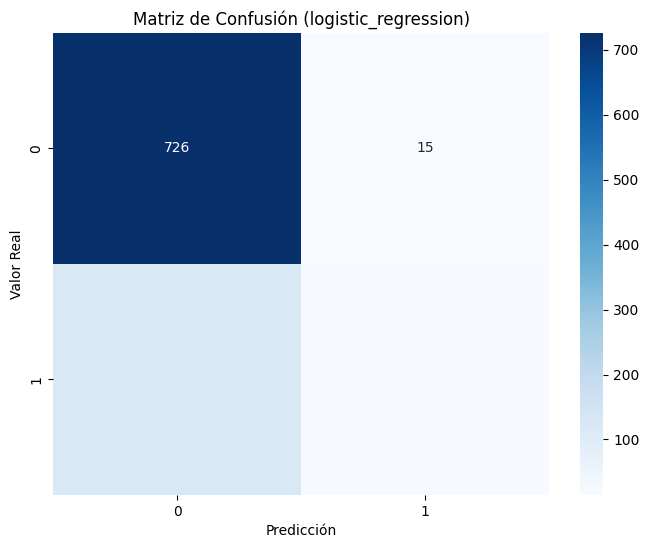

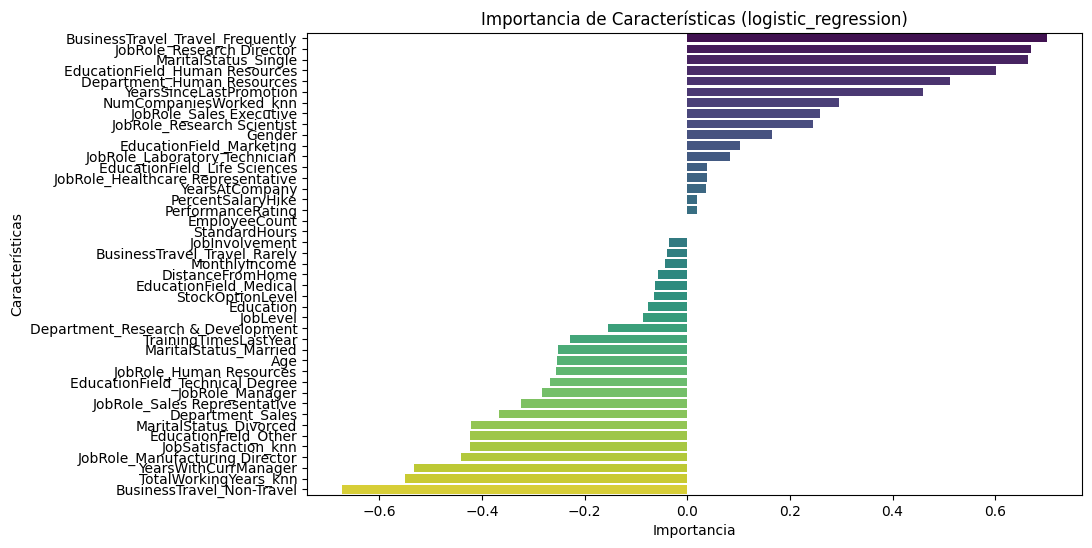

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.847789,0.818320,0.847789,0.807969,0.197909,0.790267,0.004502,8.0,NaN,NaN,regresion logistica
test,0.845805,0.811467,0.845805,0.804518,0.174805,0.714905,NaN,NaN,0.004502,8.0,regresion logistica


In [4]:
GestorLogistica.ajustar_modelo("logistic_regression")

GestorLogistica.plot_matriz_confusion("logistic_regression")
GestorLogistica.importancia_predictores(modelo_nombre ='logistic_regression')

df_resultados = GestorLogistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

El mejor modelo es DecisionTreeClassifier(max_depth=3, max_features=0.6, min_samples_leaf=10,
                       min_samples_split=30)


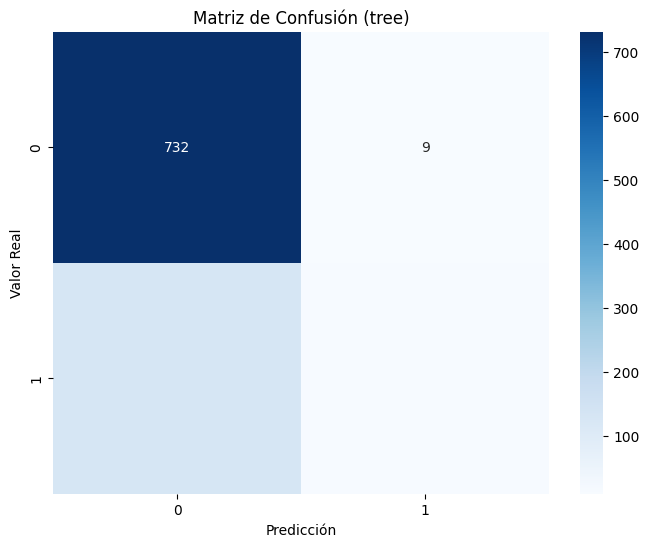

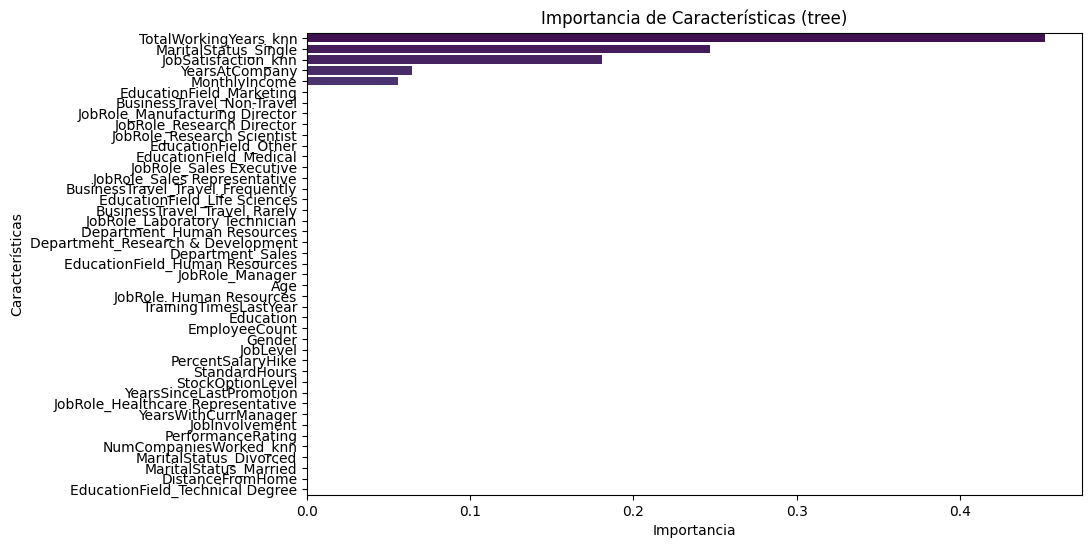

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.855159,0.840969,0.855159,0.812884,0.214508,0.705199,0.004000,8.0,NaN,NaN,decision tree
test,0.844671,0.809558,0.844671,0.793744,0.121603,0.649721,NaN,NaN,0.004000,8.0,decision tree
train,0.847789,0.818320,0.847789,0.807969,0.197909,0.790267,0.004502,8.0,NaN,NaN,regresion logistica
test,0.845805,0.811467,0.845805,0.804518,0.174805,0.714905,NaN,NaN,0.004502,8.0,regresion logistica


In [5]:
GestorLogistica.ajustar_modelo("tree")

GestorLogistica.plot_matriz_confusion("tree")
GestorLogistica.importancia_predictores(modelo_nombre ='tree')

df_resultados_tree = GestorLogistica.calcular_metricas(modelo_nombre =  "tree" )
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

El mejor modelo es RandomForestClassifier(max_depth=3, max_features=0.7, min_samples_leaf=15,
                       min_samples_split=25)


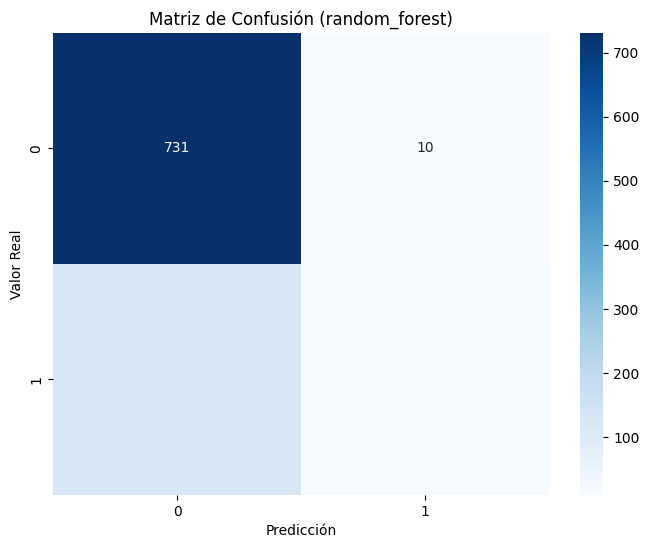

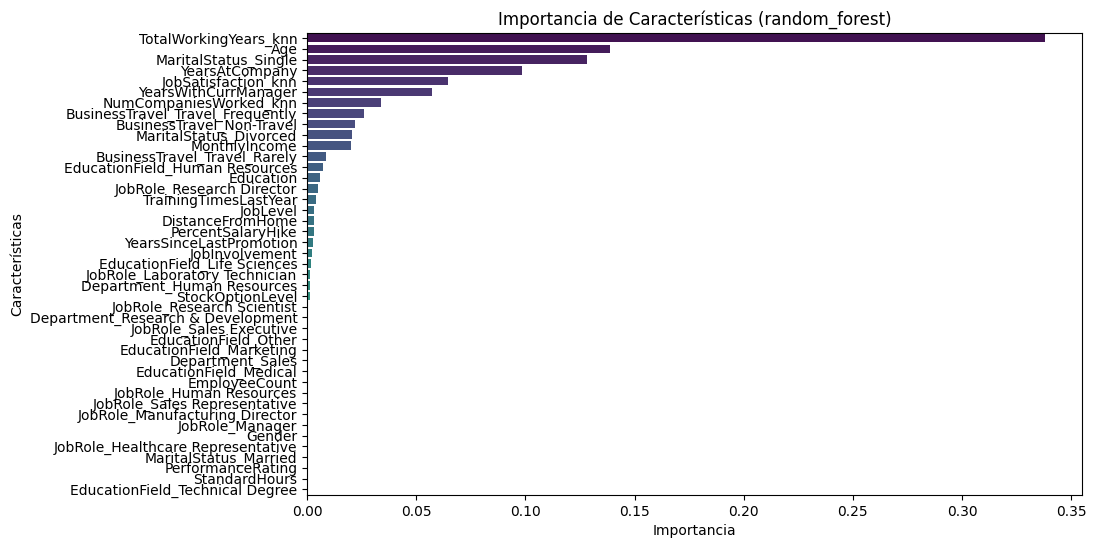

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.855159,0.840969,0.855159,0.812884,0.214508,0.705199,0.004000,8.0,NaN,NaN,decision tree
test,0.844671,0.809558,0.844671,0.793744,0.121603,0.649721,NaN,NaN,0.004000,8.0,decision tree
train,0.847789,0.818320,0.847789,0.807969,0.197909,0.790267,0.004502,8.0,NaN,NaN,regresion logistica
test,0.845805,0.811467,0.845805,0.804518,0.174805,0.714905,NaN,NaN,0.004502,8.0,regresion logistica
train,0.857426,0.845732,0.857426,0.816769,0.231602,0.780384,0.028764,NaN,NaN,NaN,random_forest
test,0.849206,0.821903,0.849206,0.804135,0.168997,0.706535,NaN,NaN,0.028764,NaN,random_forest


In [6]:
GestorLogistica.ajustar_modelo("random_forest")

GestorLogistica.plot_matriz_confusion("random_forest")
GestorLogistica.importancia_predictores(modelo_nombre ='random_forest')

df_resultados_forest = GestorLogistica.calcular_metricas(modelo_nombre =  "random_forest" )
df_resultados_forest["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.03, max_features=0.6,
                           min_samples_leaf=10, min_samples_split=20,
                           n_estimators=150, subsample=0.8)


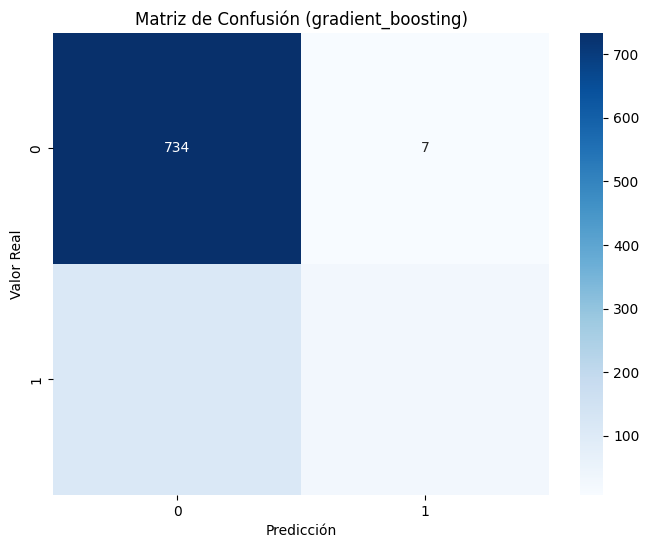

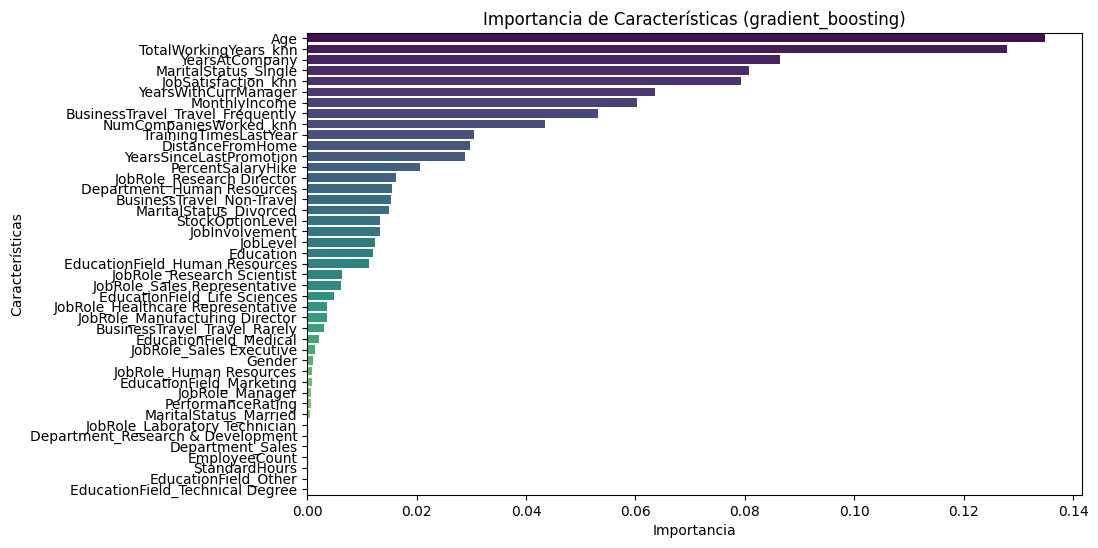

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.855159,0.840969,0.855159,0.812884,0.214508,0.705199,0.004000,8.0,NaN,NaN,decision tree
test,0.844671,0.809558,0.844671,0.793744,0.121603,0.649721,NaN,NaN,0.004000,8.0,decision tree
train,0.847789,0.818320,0.847789,0.807969,0.197909,0.790267,0.004502,8.0,NaN,NaN,regresion logistica
test,0.845805,0.811467,0.845805,0.804518,0.174805,0.714905,NaN,NaN,0.004502,8.0,regresion logistica
train,0.857426,0.845732,0.857426,0.816769,0.231602,0.780384,0.028764,NaN,NaN,NaN,random_forest
test,0.849206,0.821903,0.849206,0.804135,0.168997,0.706535,NaN,NaN,0.028764,NaN,random_forest
train,0.873299,0.873783,0.873299,0.842202,0.342966,0.899885,0.011009,8.0,NaN,NaN,gradient_boosting
test,0.862812,0.854144,0.862812,0.825490,0.262776,0.814923,NaN,NaN,0.011009,8.0,gradient_boosting


In [7]:
GestorLogistica.ajustar_modelo("gradient_boosting")

GestorLogistica.plot_matriz_confusion("gradient_boosting")
GestorLogistica.importancia_predictores(modelo_nombre ='gradient_boosting')


df_resultados_gradient = GestorLogistica.calcular_metricas(modelo_nombre =  "gradient_boosting" )
df_resultados_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient], axis = 0)
df_resultados_final


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


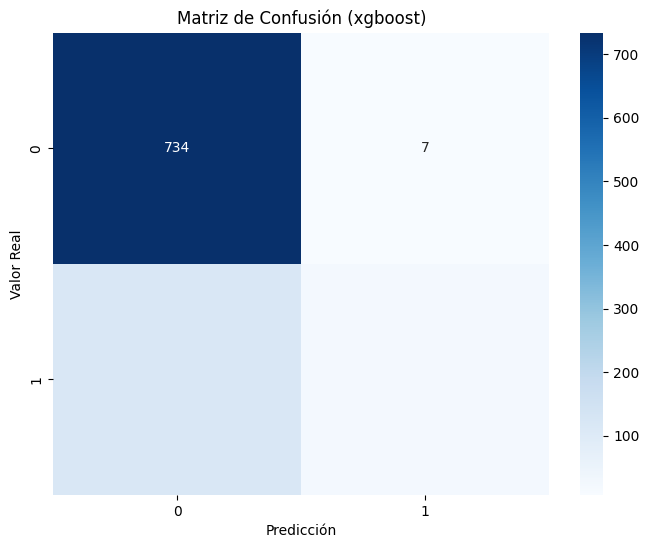

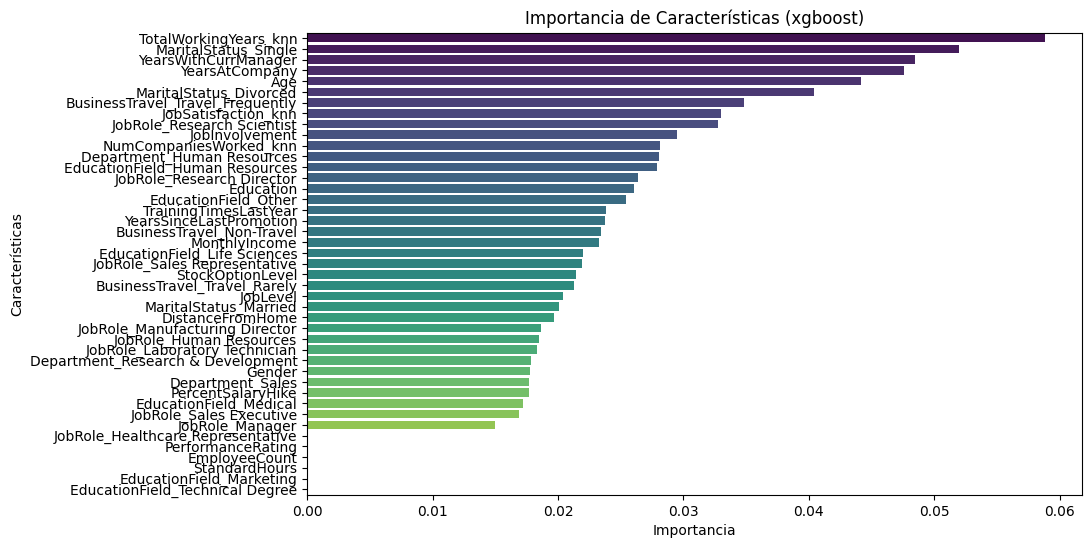

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.855159,0.840969,0.855159,0.812884,0.214508,0.705199,0.004000,8.0,NaN,NaN,decision tree
test,0.844671,0.809558,0.844671,0.793744,0.121603,0.649721,NaN,NaN,0.004000,8.0,decision tree
train,0.847789,0.818320,0.847789,0.807969,0.197909,0.790267,0.004502,8.0,NaN,NaN,regresion logistica
test,0.845805,0.811467,0.845805,0.804518,0.174805,0.714905,NaN,NaN,0.004502,8.0,regresion logistica
train,0.857426,0.845732,0.857426,0.816769,0.231602,0.780384,0.028764,NaN,NaN,NaN,random_forest
test,0.849206,0.821903,0.849206,0.804135,0.168997,0.706535,NaN,NaN,0.028764,NaN,random_forest
train,0.873299,0.873783,0.873299,0.842202,0.342966,0.899885,0.011009,8.0,NaN,NaN,gradient_boosting
test,0.862812,0.854144,0.862812,0.825490,0.262776,0.814923,NaN,NaN,0.011009,8.0,gradient_boosting
train,0.862812,0.860000,0.862812,0.823842,0.261391,0.881263,0.013945,NaN,NaN,NaN,xgboost
test,0.857143,0.844207,0.857143,0.815103,0.216066,0.784860,NaN,NaN,0.013945,NaN,xgboost


In [8]:
GestorLogistica.ajustar_modelo("xgboost")

GestorLogistica.plot_matriz_confusion("xgboost")
GestorLogistica.importancia_predictores(modelo_nombre ='xgboost')

df_resultados_xgboost = GestorLogistica.calcular_metricas(modelo_nombre =  "xgboost" )
df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)
df_resultados_final

In [14]:
df_comparacion = df_resultados_final.copy()
df_comparacion.reset_index(inplace = True, drop = True)
df_comparacion.drop(["time_seconds", "n_jobs", "tiempo_computacion(segundos)", "nucleos_usados"], axis=1, inplace=True)
df_comparacion = df_comparacion.style.apply(sc.color_filas_por_modelo, axis=1)
df_comparacion

,accuracy,precision,recall,f1,kappa,auc,modelo
0,0.855159,0.840969,0.855159,0.812884,0.214508,0.705199,decision tree
1,0.844671,0.809558,0.844671,0.793744,0.121603,0.649721,decision tree
2,0.847789,0.818320,0.847789,0.807969,0.197909,0.790267,regresion logistica
3,0.845805,0.811467,0.845805,0.804518,0.174805,0.714905,regresion logistica
4,0.857426,0.845732,0.857426,0.816769,0.231602,0.780384,random_forest
5,0.849206,0.821903,0.849206,0.804135,0.168997,0.706535,random_forest
6,0.873299,0.873783,0.873299,0.842202,0.342966,0.899885,gradient_boosting
7,0.862812,0.854144,0.862812,0.825490,0.262776,0.814923,gradient_boosting
8,0.862812,0.860000,0.862812,0.823842,0.261391,0.881263,xgboost
9,0.857143,0.844207,0.857143,0.815103,0.216066,0.784860,xgboost


# Informe sobre Métricas de Modelos Predictivos

En esta tabla se presentan las métricas de evaluación de varios modelos predictivos utilizados para un problema de clasificación. Cada fila representa un modelo y sus métricas de desempeño. A continuación, se analizan los resultados.

---

## **Métricas Presentadas:**
1. **Accuracy**: Proporción de predicciones correctas respecto al total.
2. **Precision**: Proporción de verdaderos positivos respecto a todas las predicciones positivas. Alta precisión indica pocos falsos positivos.
3. **Recall**: Proporción de verdaderos positivos respecto al total de positivos reales. Un recall alto indica pocos falsos negativos.
4. **F1-Score (F1)**: Media armónica entre precision y recall. Útil cuando los datos están desbalanceados.
5. **Kappa**: Métrica que evalúa la concordancia entre las predicciones del modelo y las reales, ajustando por el azar.
6. **AUC (Área bajo la curva ROC)**: Mide la capacidad del modelo para discriminar entre clases. Un AUC cercano a 1 es ideal.

---

## **Análisis por Modelo**

### **1. Decision Tree**

- **Accuracy**: ~85.5%.
- **Precision & Recall**: Ambos valores están equilibrados (~84-85%), lo que indica un rendimiento decente.
- **F1-Score**: 0.81, lo que refleja un buen balance entre precisión y recall.
- **Kappa**: ~0.21, lo que sugiere un desempeño moderado en comparación con un clasificador aleatorio.
- **AUC**: ~0.70, lo que indica una discriminación razonable entre clases.

---

### **2. Regresión Logística**

- **Accuracy**: ~84.7%.
- **Precision & Recall**: Valores cercanos (~81-82%), pero menores que los de otros modelos avanzados.
- **F1-Score**: ~0.80, similar al Decision Tree.
- **Kappa**: ~0.17, lo que indica un desempeño apenas mejor que un clasificador aleatorio.
- **AUC**: ~0.71, una ligera mejora respecto al Decision Tree.


---

### **3. Random Forest**

- **Accuracy**: ~85.7%.
- **Precision & Recall**: Ambos son altos (~84-85%), mostrando un equilibrio sólido.
- **F1-Score**: ~0.82, ligeramente superior al Decision Tree y Regresión Logística.
- **Kappa**: ~0.23, mejor que Decision Tree y Regresión Logística.
- **AUC**: ~0.78, una mejora en la discriminación entre clases.

---

### **4. Gradient Boosting**

- **Accuracy**: ~87.3%, el más alto entre los modelos.
- **Precision & Recall**: Ambos son sobresalientes (~87.3%), lo que indica un excelente equilibrio entre falsos positivos y negativos.
- **F1-Score**: 0.84, el mejor entre los modelos evaluados.
- **Kappa**: ~0.34, el más alto, indicando una concordancia mucho mejor que otros modelos.
- **AUC**: ~0.89, excelente discriminación entre clases.

---

### **5. XGBoost**

- **Accuracy**: ~86.2%.
- **Precision & Recall**: Ambos son altos (~86%), mostrando un rendimiento sólido.
- **F1-Score**: ~0.82, similar al Random Forest.
- **Kappa**: ~0.26
- **AUC**: ~0.88

---

## **Comparativa General**

-  **Gradient Boosting** se destaca como el modelo con el mejor desempeño global, mostrando el mayor balance entre precisión, recall, F1-Score, y AUC.

-  **XGBoost** ofrece un rendimiento comparable al Gradient Boosting, con diferencias grandes entre en train y el test en AUC.
---
